# Bagging and Random Forest with OOB and K fold cross validation

In [1]:
# importing important libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   # To do the visualization in Python

UsageError: unrecognized arguments: # To do the visualization in Python


In [2]:
# Path of the file
path="F:/Jitendra/IPBA/Training/Machine Learning/Decision Tree/HR_data.csv"

In [3]:
# Read the data into data frame
data=pd.read_csv(path)

In [4]:
# Check the first 5 records
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Do we have missing values in the datframe 
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
# Check the data types
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [7]:
# Unique values of sales columns
data['sales'].unique().tolist()  # Not a correct name for column 

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [8]:
# Rename sales column from sales to dept
data.rename(columns={'sales':'dept'},inplace=True)  # Change column name 

In [9]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
# Before data goes in for modeling, you have to convert categorical variables into dummies
data_dummy=pd.get_dummies(data)

In [11]:
# Check the top 5 records of dummy table
data_dummy.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [12]:
# For sklearn library you have to separate out target varible data frame and Independent variables dataframe
# X ==> Data frame of independent variable (drop the target variable 'left')
# .values in the end covert the data frame to an array and sklearn library is comfortable working with arrays
X=data_dummy.drop("left",axis=1).values

In [13]:
# Print array of X variables
X

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [14]:
# y ==> target variable
y=data_dummy['left'].values

In [15]:
# Print array of y variable
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## ------------------------Bagging Classifier--------------------------

In [ ]:
# Steps to create a model
# 1. Create a train data and a test data for model validation
# 2. Create an object of the ensemble class (clf) which will be a Ensemble of DT Classifier object...
# ...(Bagging or RF classifier/ Regressor)
# 3. Instantiate the object of the class with its required method (Bagging/ RF )
# 4. Fit the model with input data - X_train,y_train using fit method of clf
# 5. Predit the output lablels (in case of classification) or continpus target variable(in case of regression) on test data
# 6. Validate/ Score the model on test set and compare the predicted outcome with actual labels/ target continous variable

In [16]:
# Import train and test data split class
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [17]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(14999, 20)
(11999, 20)
(3000, 20)


In [18]:
# Import library for ensemble models
from sklearn import ensemble  # This is my ensemble class
# from sklearn.tree import DecisionTreeClassifier # This is my base learner ( Classifier decision tree)

In [19]:
dir(ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'StackingClassifier',
 'StackingRegressor',
 'VotingClassifier',
 'VotingRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_base',
 '_forest',
 '_gb',
 '_gb_losses',
 '_gradient_boosting',
 '_iforest',
 '_stacking',
 '_voting',
 '_weight_boosting',
 'typing']

In [20]:
# Creating and initializing Baggig Classifier object
clf=ensemble.BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400)


# oob_score = True >> out of bag to be computed or not 
# n_estimators - number of trees we want to create
# n_jobs > # of cores to be used for parellel processing. If -1, use all the cpu cores
# base estimator = by default is is DT, but we can change it to SVC etc.

# clf=ensemble.BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
#                     base_estimator = DecisionTreeClassifier())

In [21]:
# Building and fitting a bagging tree 
clf.fit(X_train,y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:643: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(n_estimators=20, n_jobs=-1, oob_score=True, random_state=400)

In [22]:
# OOB Accuracy # Average accuracy on OOB dataset ( testing set for each tree)
# Accuracy on the training set - accuracy on the OOB set of each tree
clf.oob_score_

0.987415617968164

In [23]:
# Accuracy on the testing dataset 
clf.score(X_test,y_test)  

0.986

In [24]:
# How to know how many estimators/ trees the bagging algo should build, so as to achieve best score
# Trying to find out the best number of estimators for the bagging model 
# This for loop will create multiple ensembles - 10, 30, 50, 70.... 190
for n_trees in range(10,200,20):
    clf=ensemble.BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=n_trees,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(n_trees))
    print ('OOB score is '+str(oob))
    print ('***********************')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:643: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9830819234936244
***********************
For n_estimators = 30
OOB score is 0.9884990415867989
***********************
For n_estimators = 50
OOB score is 0.9892491040920076
***********************
For n_estimators = 70
OOB score is 0.9895824652054338
***********************
For n_estimators = 90
OOB score is 0.990082506875573
***********************
For n_estimators = 110
OOB score is 0.990082506875573
***********************
For n_estimators = 130
OOB score is 0.9903325277106425
***********************
For n_estimators = 150
OOB score is 0.990415867988999
***********************
For n_estimators = 170
OOB score is 0.9902491874322861
***********************
For n_estimators = 190
OOB score is 0.9901658471539295
***********************


In [57]:
#Finalizing on a ensemble model with 150 trees
clf=ensemble.BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=150,random_state=400)
clf.fit(X_train,y_train)

BaggingClassifier(n_estimators=150, n_jobs=-1, oob_score=True, random_state=400)

In [58]:
# Confusion Matrix and AUC
#### How good is it when it comes to making predictions?
## Accuracy? test_data
predicted_labels=clf.predict(X_test)
predicted_labels

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [59]:
# Predcting the probability of the stayed and left class
# It will give an array of 0 and 1 class (stayed and left respectively)
probs = clf.predict_proba(X_test)
probs

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.97333333, 0.02666667],
       [1.        , 0.        ]])

In [60]:
### Confusion Matrix
from sklearn import metrics
# Plot confusion matrix
metrics.confusion_matrix(y_test,predicted_labels)

array([[2260,   11],
       [  21,  708]], dtype=int64)

In [61]:
#### Confusion Matrix relies on a threshold that I choose
#### AUC
probs_left = probs[:,1]
metrics.roc_auc_score(y_test,probs_left)  # probs[:,1] >> first columns of stayed and left array of probabilities

0.9899946181320025

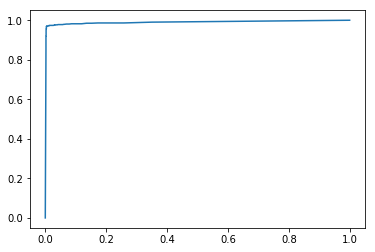

In [62]:
# Getting FPR, TPR and Threshold
fpr,tpr,thr=metrics.roc_curve(y_test,probs_left)
# Plotting ROC
plt.plot(fpr,tpr,"-")

In [63]:
# Feature Importance
# Information about all the 150 trees that were tries in ensemble 
clf.estimators_   # You will see one entry for each of the 150 trees 

[DecisionTreeClassifier(random_state=1859118377),
 DecisionTreeClassifier(random_state=1559503733),
 DecisionTreeClassifier(random_state=1714796222),
 DecisionTreeClassifier(random_state=1907120008),
 DecisionTreeClassifier(random_state=2074988447),
 DecisionTreeClassifier(random_state=270530007),
 DecisionTreeClassifier(random_state=494610195),
 DecisionTreeClassifier(random_state=914653141),
 DecisionTreeClassifier(random_state=1249763274),
 DecisionTreeClassifier(random_state=1698305238),
 DecisionTreeClassifier(random_state=764038977),
 DecisionTreeClassifier(random_state=554023484),
 DecisionTreeClassifier(random_state=980045649),
 DecisionTreeClassifier(random_state=618787335),
 DecisionTreeClassifier(random_state=1478338621),
 DecisionTreeClassifier(random_state=878522688),
 DecisionTreeClassifier(random_state=1479530151),
 DecisionTreeClassifier(random_state=529095905),
 DecisionTreeClassifier(random_state=1322465795),
 DecisionTreeClassifier(random_state=2138769912),
 Decision

In [64]:
print (clf.estimators_[0]) # Information of first tree

DecisionTreeClassifier(random_state=1859118377)


In [33]:
# What are the important features according to the first tree
print ("Tree 1 Feature Importance \n", clf.estimators_[0].feature_importances_, "\n")

# What are the important features according to the second tree
print ("Tree 2 Feature Importance \n", clf.estimators_[1].feature_importances_, "\n")

# feature imporatnace data for tree number 150
print ("Tree 150 Feature Importance \n", clf.estimators_[149].feature_importances_, "\n")

Tree 1 Feature Importance 
 [5.05132052e-01 1.32278580e-01 1.09549979e-01 7.25546688e-02
 1.56255590e-01 9.77054732e-04 3.25242845e-04 9.23910569e-04
 1.08261950e-03 2.53629992e-03 4.89557936e-04 1.25108377e-03
 8.91966484e-04 8.15148799e-04 2.43313148e-03 2.96579677e-03
 3.16560556e-03 5.68974302e-04 4.97063874e-03 8.32099901e-04] 

Tree 2 Feature Importance 
 [3.86864908e-01 1.65497880e-01 2.19807061e-01 7.86005696e-02
 1.28854285e-01 2.42813434e-03 7.57130099e-06 6.03048998e-04
 0.00000000e+00 1.37024526e-03 6.56585426e-04 1.12741732e-04
 1.44226767e-03 5.84106267e-04 1.61694260e-03 3.32979477e-03
 3.21225805e-03 1.66973547e-03 1.98301782e-03 1.35884640e-03] 

Tree 150 Feature Importance 
 [4.85386060e-01 1.42527203e-01 1.03746993e-01 7.52442492e-02
 1.69116700e-01 1.81398709e-03 7.85296324e-04 8.57053747e-04
 7.47246752e-04 8.29738619e-04 3.05751002e-04 3.54748679e-04
 5.43472079e-04 5.24867889e-04 2.09889421e-03 3.92573687e-03
 1.40514121e-03 1.56644449e-03 4.13164479e-03 4.088771

In [35]:
# We can extract feature importance from each tree then take a mean for all trees
# Create an empty list of feature importances
imp=[]

# Loop over various estimators (150 trees) feature importances 
for i in clf.estimators_:
    imp.append(i.feature_importances_)

imp=np.mean(imp,axis=0)  # Averaging the feature importance from all the trees 
imp

array([4.94406926e-01, 1.37858036e-01, 1.10367384e-01, 9.75657099e-02,
       1.37457774e-01, 1.56322822e-03, 1.65693351e-04, 1.55038378e-03,
       6.43746754e-04, 1.39149484e-03, 5.78268029e-04, 4.88292739e-04,
       7.13635750e-04, 6.52154411e-04, 2.54031558e-03, 2.83330926e-03,
       3.14726578e-03, 8.87796128e-04, 3.08386681e-03, 2.10471855e-03])

In [36]:
# Getting feature names
feature_names = data_dummy.drop("left", axis = 1).columns
feature_names.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [37]:
# Append feature name against feature importance values
feature_importance=pd.Series(imp,index=feature_names)

In [38]:
# Sort values by Feature Importance
feature_importance.sort_values(ascending=False)

satisfaction_level       0.494407
last_evaluation          0.137858
time_spend_company       0.137458
number_project           0.110367
average_montly_hours     0.097566
dept_technical           0.003147
salary_low               0.003084
dept_support             0.002833
dept_sales               0.002540
salary_medium            0.002105
Work_accident            0.001563
dept_IT                  0.001550
dept_accounting          0.001391
salary_high              0.000888
dept_marketing           0.000714
dept_product_mng         0.000652
dept_RandD               0.000644
dept_hr                  0.000578
dept_management          0.000488
promotion_last_5years    0.000166
dtype: float64

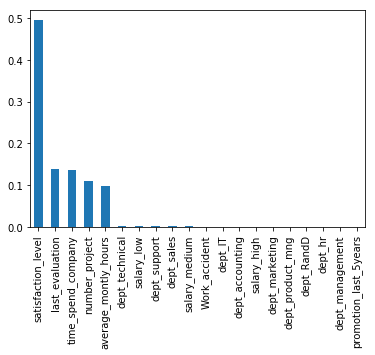

In [41]:
# Displaying the results in bar chart
%matplotlib inline 
feature_importance.sort_values(ascending=False).plot(kind='bar')

## ------------------------Random Forest Classifier---------------------

In [42]:
# Import random forest classifier class
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Create model
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [44]:
# Fit model
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=400)

In [45]:
# Get average OOB score of the model
clf.oob_score_

0.9905825485457121

In [46]:
# Test data validation
clf.score(X_test,y_test)

#?? What do you think will clf.score(X_train,y_train) give in the output?? How is this different from OOB_score
## Ans. this will give accuracy of the entire model on the train data, which could be effected by overfitting
## On the other hand OOB score is validating the model while it is getting trained using bootstrap sampling
## Check this link - https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

0.9886666666666667

In [48]:
# Create multiple ensembles in a range with steps
for n_trees in range(10,150,20):
    #clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    clf=RandomForestClassifier(n_estimators=n_trees, oob_score=True, n_jobs=-1,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(n_trees))
    print ('OOB score is '+str(oob))
    print ('************************')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9832486040503375
************************
For n_estimators = 30
OOB score is 0.9894991249270773
************************
For n_estimators = 50
OOB score is 0.990082506875573
************************
For n_estimators = 70
OOB score is 0.9905825485457121
************************
For n_estimators = 90
OOB score is 0.9904992082673556
************************
For n_estimators = 110
OOB score is 0.9908325693807817
************************
For n_estimators = 130
OOB score is 0.9908325693807817
************************


In [49]:
#Finalize 70 trees
clf=RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=400)

In [50]:
# Fit final model
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=70, n_jobs=-1, oob_score=True,
                       random_state=400)

In [51]:
# Predict labels on test data
clf.predict(X_test)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [52]:
# 70 tress/ estimators
clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=724685148),
 DecisionTreeClassifier(max_features='auto', random_state=1252593103),
 DecisionTreeClassifier(max_features='auto', random_state=970656062),
 DecisionTreeClassifier(max_features='auto', random_state=807842745),
 DecisionTreeClassifier(max_features='auto', random_state=1543176332),
 DecisionTreeClassifier(max_features='auto', random_state=1015616499),
 DecisionTreeClassifier(max_features='auto', random_state=1247232407),
 DecisionTreeClassifier(max_features='auto', random_state=1454861574),
 DecisionTreeClassifier(max_features='auto', random_state=636582133),
 DecisionTreeClassifier(max_features='auto', random_state=1466331272),
 DecisionTreeClassifier(max_features='auto', random_state=51747435),
 DecisionTreeClassifier(max_features='auto', random_state=1015100607),
 DecisionTreeClassifier(max_features='auto', random_state=1186072774),
 DecisionTreeClassifier(max_features='auto', random_state=1854299675),
 DecisionTre

In [53]:
# Getting feature importances (alre)
clf.feature_importances_

array([0.28883849, 0.12591749, 0.19531167, 0.15847762, 0.1808333 ,
       0.01040634, 0.0019799 , 0.0018636 , 0.00170258, 0.0017804 ,
       0.00164586, 0.00166899, 0.00137172, 0.00124563, 0.00356287,
       0.00308658, 0.00371377, 0.00564443, 0.00746029, 0.00348845])

In [54]:
# Appending feature names
imp_feat=pd.Series(clf.feature_importances_,index=feature_names.tolist())

In [55]:
# Sorting by feature importances
imp_feat.sort_values(ascending=False)

satisfaction_level       0.288838
number_project           0.195312
time_spend_company       0.180833
average_montly_hours     0.158478
last_evaluation          0.125917
Work_accident            0.010406
salary_low               0.007460
salary_high              0.005644
dept_technical           0.003714
dept_sales               0.003563
salary_medium            0.003488
dept_support             0.003087
promotion_last_5years    0.001980
dept_IT                  0.001864
dept_accounting          0.001780
dept_RandD               0.001703
dept_management          0.001669
dept_hr                  0.001646
dept_marketing           0.001372
dept_product_mng         0.001246
dtype: float64

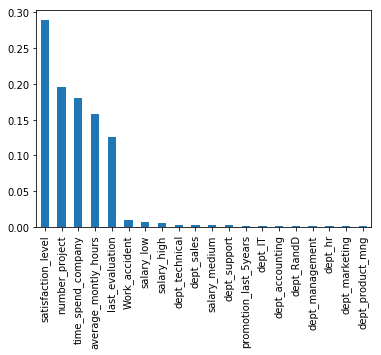

In [56]:
# Plotting bar chart of fetaures importances
imp_feat.sort_values(ascending=False).plot(kind='bar')

#### Note - OOB score (Out of Bag concept in general) is true only when we have bootstrap sampling)
#### Thus OOB validation is only applicable for Bagging and Random Forest models.. it cannot be true for other models
#### K fold cross validation comes to rescue, which is applicable for all the types of models

## ------------------Modeling with K Fold cross validation-----------------

In [ ]:
#### Implementation through Cross validation as against OOB error #####
### Find train and validation sets  ####
from sklearn.model_selection import KFold

In [ ]:
# Creating 5 folds (samples)
kf = KFold(n_splits=5,random_state=42,shuffle=True)

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [ ]:
### Implementation for  100 trees 
from sklearn import ensemble

In [ ]:
# Getting train and validation indexes
# Empty AUC list to collect AUC values of 5 models with 100 estimators
AUC =[]

# Loop over 5 folds to get train (dev) and test (validation) indexes from X_train and y_train
# Create Bagging/ RF/ XGB classifiers, fit them one by one on dev samples (5) and get predictions on 5 validation samples
# This will then give 5 AUC values for 5 different models having done with 5 fold cross validation
# Average the 5 AUC values and get one AUC for the entore ensemble

for dev_index, validation_index in kf.split(X_train):
    print("TRAIN:", dev_index, "TEST:", validation_index)
    X_dev, X_validation = X_train[dev_index], X_train[validation_index]
    y_dev, y_validation = y_train[dev_index], y_train[validation_index]
    clf=ensemble.BaggingClassifier(n_jobs=-1,n_estimators=100,random_state=400)
    clf = clf.fit(X_dev, y_dev)
    ### train my model on dev set and obtain some accuracy measure on validation set
    preds=clf.predict(X_validation)
    probs=clf.predict_proba(X_validation)[:,1]
    auc = metrics.roc_auc_score(y_validation,probs)
    AUC.append(auc)
# Training accuracy
print(AUC)
print("Mean AUC = ",np.array(AUC).mean())

In [ ]:
# How to chose best # of estimators (best value hyperparameter selection)?
# Create a function which will take # of trees as input paramenter to run multiple ensemble models with ..
# .. 5 fold cross validation each and throw the AUC values

def cross_val_fn(n_trees):
    AUC =[]
    for dev_index, validation_index in kf.split(X_train):
        print("TRAIN:", dev_index, "TEST:", validation_index)
        X_dev, X_validation = X_train[dev_index], X_train[validation_index]
        y_dev, y_validation = y_train[dev_index], y_train[validation_index]
        clf=ensemble.BaggingClassifier(n_jobs=-1,n_estimators=n_trees,random_state=400)
        clf = clf.fit(X_dev, y_dev)
        ### train my model on dev set and obtain some accuracy measure on validation set
        # preds=clf.predict(X_validation)
        probs=clf.predict_proba(X_validation)[:,1]
        auc = metrics.roc_auc_score(y_validation,probs)
        AUC.append(auc)
    print("Mean AUC = ",np.array(AUC).mean())
    return np.array(AUC).mean()

In [ ]:
# Blank dictionary for AUC for different iterations of n_estimators
n_estimator_dict={}

# 2 keys # tress and AUC
# Value pairs - n_tress and AUC output by the function
n_estimator_dict['trees']=[]
n_estimator_dict['AUC']=[]

# Run many iterations of ensemble models starting from 10 trees till 200 tress with 20 steps frequency.. 10, 30, 50, 70,....190
for tree in range(10,200,20):
    AUC=cross_val_fn(tree)
    n_estimator_dict['trees'].append(tree)
    n_estimator_dict['AUC'].append(AUC)

In [ ]:
# Checking the outputs in dictionary
n_estimator_dict

In [ ]:
# Iterating through multiple combinations of hyperparameters
# Eg
trees=[100,120,130]
min_samples_split=[2,4,6]

In [ ]:
# Import the library for creating cross product of tress and min sample split
import itertools

In [ ]:
# Chek how itertools work
for tree,min_samples in itertools.product(trees,min_samples_split):
    print(tree,min_samples)

In [ ]:
# Create a function to run multiple ensembles by lopping over cross product of multiple hyperparameters
def cross_val_fn(n_trees, min_samples):
    AUC =[]
    for dev_index, validation_index in kf.split(X_train):
        print("TRAIN:", dev_index, "TEST:", validation_index)
        X_dev, X_validation = X_train[dev_index], X_train[validation_index]
        y_dev, y_validation = y_train[dev_index], y_train[validation_index]
        clf=ensemble.RandomForestClassifier(n_jobs=-1,n_estimators=n_trees,min_samples_split=min_samples,
                                       random_state=400)
        clf = clf.fit(X_dev, y_dev)
        ### train my model on dev set and obtain some accuracy measure on validation set
        # preds=clf.predict(X_validation)
        
        probs=clf.predict_proba(X_validation)[:,1]
        auc = metrics.roc_auc_score(y_validation,probs)
        AUC.append(auc)
    print("Mean AUC = ",np.array(AUC).mean())
    return np.array(AUC).mean()

In [ ]:
# Blank dictionary for AUC for different iterations of n_estimators
n_estimator_dict={}
n_estimator_dict['trees']=[]
n_estimator_dict['Min Sample'] =[]
n_estimator_dict['AUC']=[]

for tree,min_samples in itertools.product(trees,min_samples_split):
    AUC=cross_val_fn(tree, min_samples)
    n_estimator_dict['trees'].append(tree)
    n_estimator_dict['Min Sample'].append(min_samples)
    n_estimator_dict['AUC'].append(AUC)

In [ ]:
# Print output in dictionary
n_estimator_dict

In [ ]:
# Create dataframe of dictionary
pd.DataFrame(n_estimator_dict)